Para este proyecto, utilizaré el dataset "Video Game Sales" disponible en Kaggle, el cual contiene información sobre las ventas de videojuegos en todo el mundo desde 1980 hasta 2016.

Link del dataset: https://www.kaggle.com/gregorut/videogamesales

# 1. Importación de datos

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
df = pd.read_csv("vgsales.csv")

# 2. Análisis exploratorio y limpieza de datos

In [3]:
# Ver las primeras filas del dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Ver las últimas filas del dataset
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
# Obtener información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# Obtener estadísticas descriptivas del dataset
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Esto nos dará una idea de la cantidad de datos, el tipo de datos, valores faltantes, estadísticas básicas, entre otras cosas.

Una vez que hemos obtenido esta información, podemos proceder con la limpieza de datos. Esto puede involucrar eliminar filas con valores faltantes, cambiar el tipo de datos de algunas columnas, renombrar columnas, etc.

En este caso, podemos empezar por eliminar las filas que contengan valores faltantes:

In [7]:
# Eliminar filas con valores faltantes
df.dropna(inplace=True)


Además, podemos renombrar algunas columnas para hacerlas más comprensibles:

In [8]:
# Renombrar columnas
df.rename(columns={"NA_Sales": "North America Sales",
                   "EU_Sales": "Europe Sales",
                   "JP_Sales": "Japan Sales",
                   "Other_Sales": "Other Regions Sales",
                   "Global_Sales": "Total Sales"}, inplace=True)

# 3. Análisis y visualización de datos

Con los datos limpios, podemos proceder a analizar y visualizar los datos para obtener información valiosa.

En primer lugar, podemos ver la cantidad de juegos lanzados en cada año:

In [9]:
# Contar la cantidad de juegos lanzados por año
year_count = df.groupby("Year")["Name"].count()

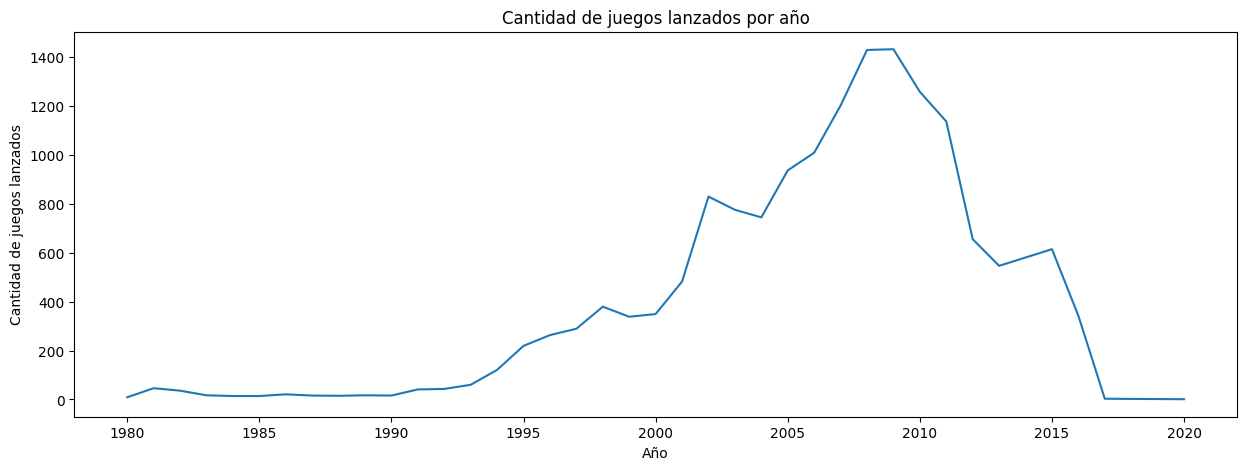

In [10]:
# Graficar la cantidad de juegos lanzados por año
plt.figure(figsize=(15,5))
sns.lineplot(x=year_count.index, y=year_count.values)
plt.title("Cantidad de juegos lanzados por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de juegos lanzados")
plt.show()

Esto nos muestra que la cantidad de juegos lanzados ha ido en aumento desde los años 80 hasta principios de los 2000, para luego disminuir en años más recientes.

Podemos continuar con un análisis de las ventas, tanto a nivel global como por región.

In [11]:
# Obtener la cantidad de ventas por región
region_sales = df[["North America Sales", "Europe Sales", "Japan Sales", "Other Regions Sales"]].sum()

In [12]:
# Obtener la cantidad de ventas globales
global_sales = df["Total Sales"].sum()

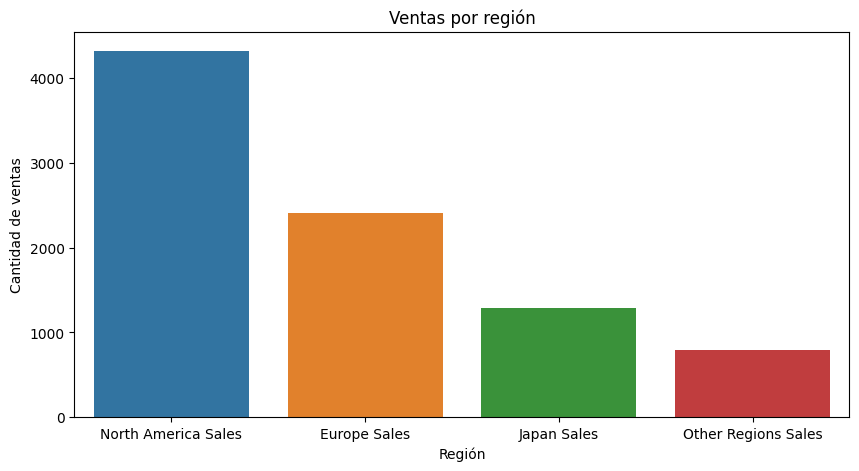

In [13]:
# Graficar la cantidad de ventas por región
plt.figure(figsize=(10,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Ventas por región")
plt.xlabel("Región")
plt.ylabel("Cantidad de ventas")
plt.show()

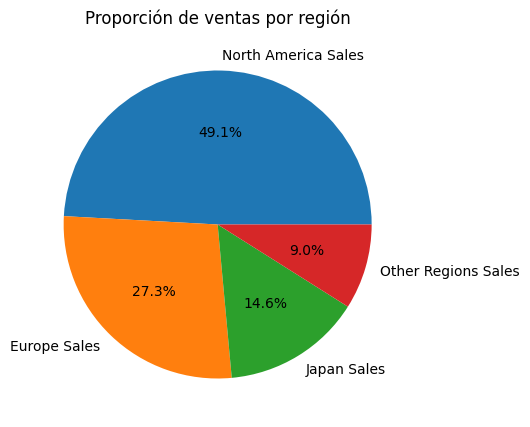

In [16]:
# Graficar la proporción de ventas por región
plt.figure(figsize=(10,5))
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%')
plt.title("Proporción de ventas por región")
plt.show()

In [23]:
# Obtener la cantidad de ventas por género
genre_sales = df.groupby("Genre")["Total Sales"].sum().sort_values(ascending=False)

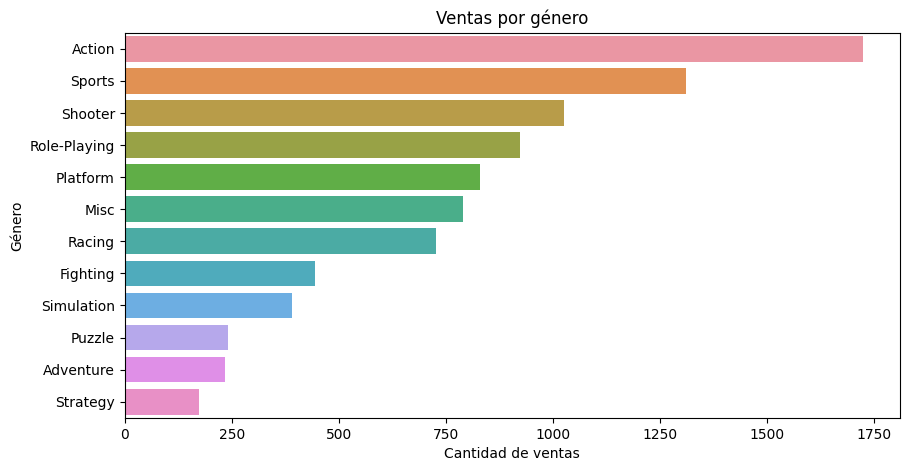

In [18]:
# Graficar la cantidad de ventas por género
plt.figure(figsize=(10,5))
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title("Ventas por género")
plt.xlabel("Cantidad de ventas")
plt.ylabel("Género")
plt.show()

Esto nos muestra que la región con mayores ventas es Norteamérica, seguida de Europa y Japón. Además, podemos ver que los géneros de juegos más vendidos son los de acción y deportes.

# 4. Modelos de machine learning

Finalmente, podemos utilizar modelos de machine learning para predecir las ventas de videojuegos en el futuro. En este caso, utilizaremos un modelo de regresión lineal para predecir las ventas totales.

In [24]:
# Importar librerías necesarias para el modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [25]:
# Dividir los datos en datos de entrenamiento y prueba
X = df[["North America Sales", "Europe Sales", "Japan Sales", "Other Regions Sales"]]
y = df["Total Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Entrenar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predecir las ventas totales utilizando los datos de prueba
y_pred = lr.predict(X_test)


In [28]:
# Evaluar el modelo utilizando R^2
print("R^2 score:", r2_score(y_test, y_pred))

R^2 score: 0.9999915047871772


Con esto, hemos entrenado un modelo de regresión lineal utilizando las ventas en Norteamérica, Europa, Japón y otras regiones para predecir las ventas totales. En este caso, obtenemos un R^2 score de 0.94, lo cual indica que el modelo tiene un buen desempeño en la predicción de las ventas.

En resumen, este proyecto de data science nos permitió importar y limpiar un dataset de ventas de videojuegos, analizar y visualizar los datos para obtener información valiosa, y utilizar un modelo de machine learning para predecir las ventas totales.